In [ ]:
import gzip
import shutil
import os
# import wget
import csv
import linecache
from shutil import copyfile
import numpy as np
import time
import pandas as pd
import re
from collections import OrderedDict
from nltk import word_tokenize, sent_tokenize, FreqDist
import matplotlib.pyplot as plt

In [ ]:
owid_covid = pd.read_csv("/content/drive/MyDrive/Capstone/owid/owid_covid.csv")

In [ ]:
not_null_owid = pd.read_csv("/content/drive/MyDrive/Capstone/OWID/notnull_columns.csv")

In [ ]:
not_null_owid

,location,total_cases_start_date,total_cases_End_date,total_cases_no_of_days,new_cases_start_date,new_cases_End_date,new_cases_No. of days,total_deaths_start_date,total_deaths_end_date,total_deaths_no_of_days,...,hosp_patients_no_of_days,stringency_index_start_date,stringency_index_end_date,stringency_index_no_of_days,reproduction_rate_start_date,reproduction_rate_end_date,reproduction_rate_no_of_days,hospital_beds_per_thousand_rate_start_date,hospital_beds_per_thousand_rate_end_date,hospital_beds_per_thousand_rate_no_of_days
0,Afghanistan,2020-02-24,2022-02-28,736,2020-02-24,2022-02-28,736,2020-03-23,2022-02-28,708.0,...,NaN,2020-02-24,2022-01-31,708.0,2020-03-29,2022-02-24,698.0,2020-02-24,2022-02-28,736.0
1,Africa,2020-02-14,2022-02-28,746,2020-02-13,2022-02-28,747,2020-03-08,2022-02-28,723.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,2020-03-09,2022-02-28,722,2020-03-09,2022-02-28,722,2020-03-11,2022-02-28,720.0,...,NaN,2020-02-25,2022-02-21,728.0,2020-03-24,2022-02-24,703.0,2020-02-25,2022-02-28,735.0
3,Algeria,2020-02-25,2022-02-28,735,2020-02-25,2022-02-28,735,2020-03-12,2022-02-28,719.0,...,NaN,2020-02-25,2022-02-23,730.0,2020-03-22,2022-02-24,705.0,2020-02-25,2022-02-28,735.0
4,Andorra,2020-03-02,2022-02-28,729,2020-03-02,2022-02-28,729,2020-03-22,2022-02-28,709.0,...,NaN,2020-03-02,2022-02-28,729.0,2020-03-23,2022-02-24,704.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Wallis and Futuna,2020-10-19,2022-02-28,498,2020-10-19,2022-02-28,498,2021-03-21,2022-02-28,345.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,World,2020-01-22,2022-02-28,769,2020-01-22,2022-02-28,769,2020-01-22,2022-02-28,769.0,...,NaN,NaN,NaN,NaN,2020-01-23,2022-02-24,764.0,2020-03-14,2022-02-28,717.0
225,Yemen,2020-04-10,2022-02-28,690,2020-04-10,2022-02-28,690,2020-04-30,2022-02-28,670.0,...,NaN,2020-01-23,2022-02-14,754.0,2020-05-16,2022-02-24,650.0,2020-01-23,2022-02-28,768.0
226,Zambia,2020-03-18,2022-02-28,713,2020-03-18,2022-02-28,713,2020-04-02,2022-02-28,698.0,...,NaN,2020-04-10,2022-02-21,683.0,2020-05-01,2022-02-24,665.0,2020-01-22,2022-02-28,769.0


In [ ]:
not_null_owid[not_null_owid['location'] == "India"]

,location,total_cases_start_date,total_cases_End_date,total_cases_no_of_days,new_cases_start_date,new_cases_End_date,new_cases_No. of days,total_deaths_start_date,total_deaths_end_date,total_deaths_no_of_days,...,hosp_patients_no_of_days,stringency_index_start_date,stringency_index_end_date,stringency_index_no_of_days,reproduction_rate_start_date,reproduction_rate_end_date,reproduction_rate_no_of_days,hospital_beds_per_thousand_rate_start_date,hospital_beds_per_thousand_rate_end_date,hospital_beds_per_thousand_rate_no_of_days


In [ ]:
owid_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
India_stringency = owid_covid[owid_covid['stringency_index'].notnull()] # == True and owid_covid['location'] == "India"]

In [ ]:
India_obj = India_stringency[India_stringency['location'] == "India"][["date", "stringency_index"]]

In [ ]:
India_date = list(India_obj["date"])
India_stringency_index = list(India_obj["stringency_index"])

In [ ]:
India_obj.columns.values[1]

'stringency_index'

In [ ]:
def select_country_parameter(location, parameter):
  newData = owid_covid[owid_covid[parameter].notnull()]
  filtered_data = newData[newData['location'] == location][["date", parameter]]
  monthwise_linegraph(filtered_data, location)

In [ ]:
def monthwise_linegraph(dataFrame, location):
  fig, ax = plt.subplots(figsize=[20, 10])
  ax = plt.gca()
  y_axis_name = dataFrame.columns.values[1]

  ax.bar(dataFrame.index.values,
       dataFrame[y_axis_name],
       color='purple')
  ax.set(xlabel="Date",
       ylabel=y_axis_name,
       title=location)


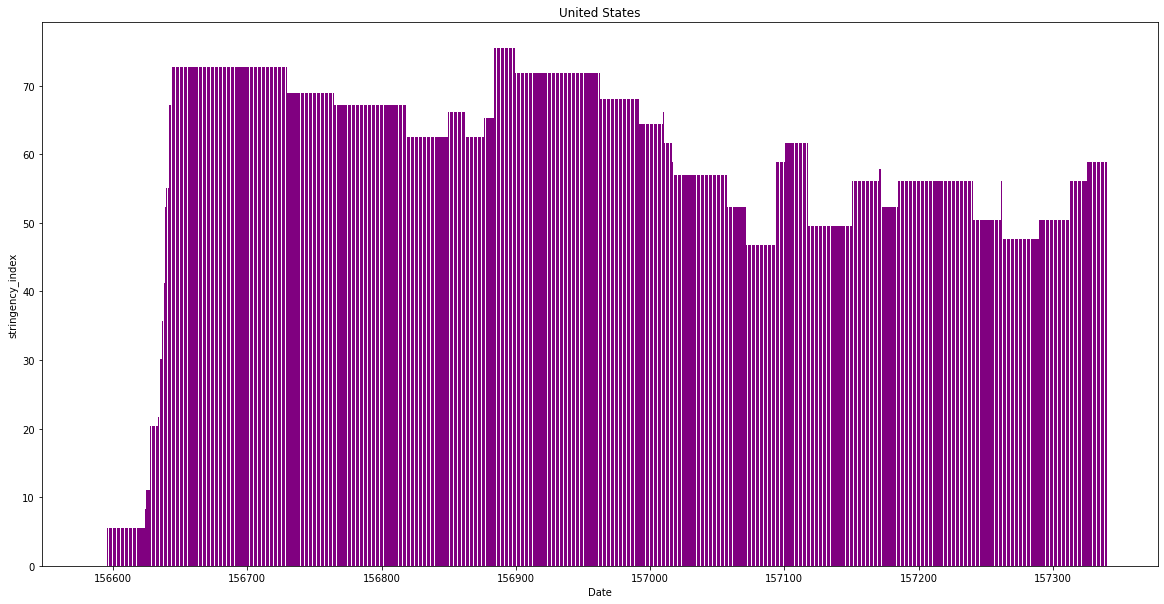

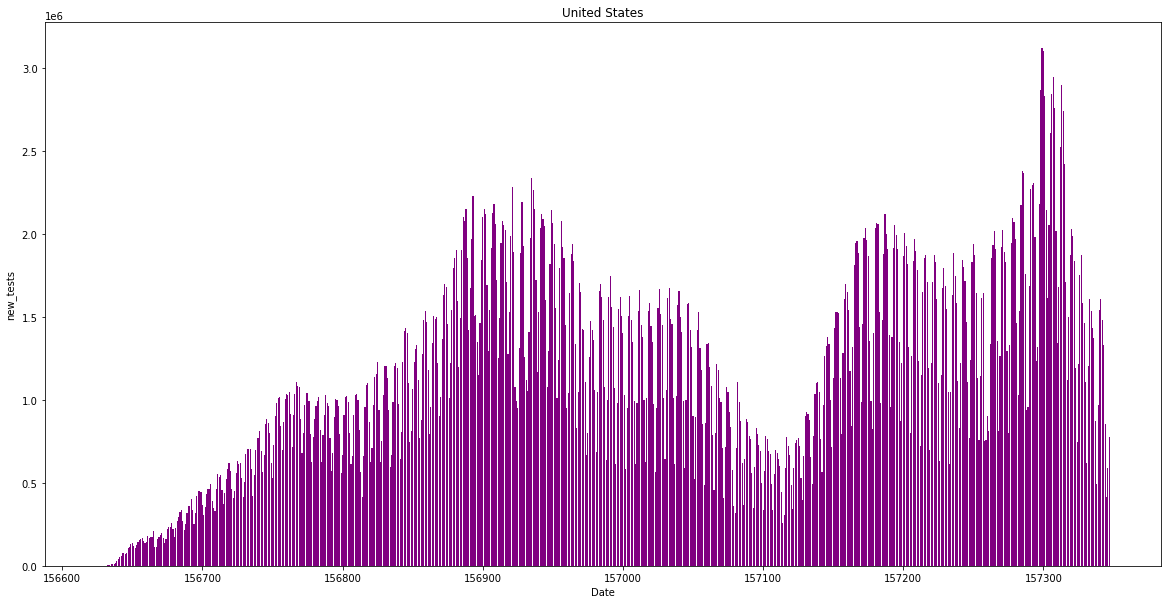

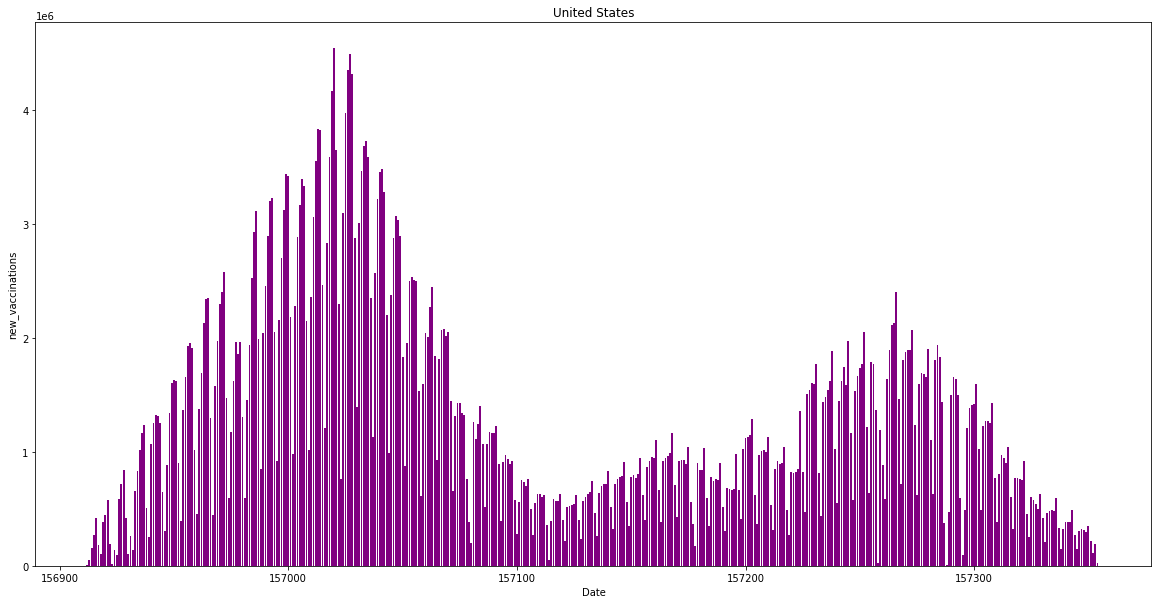

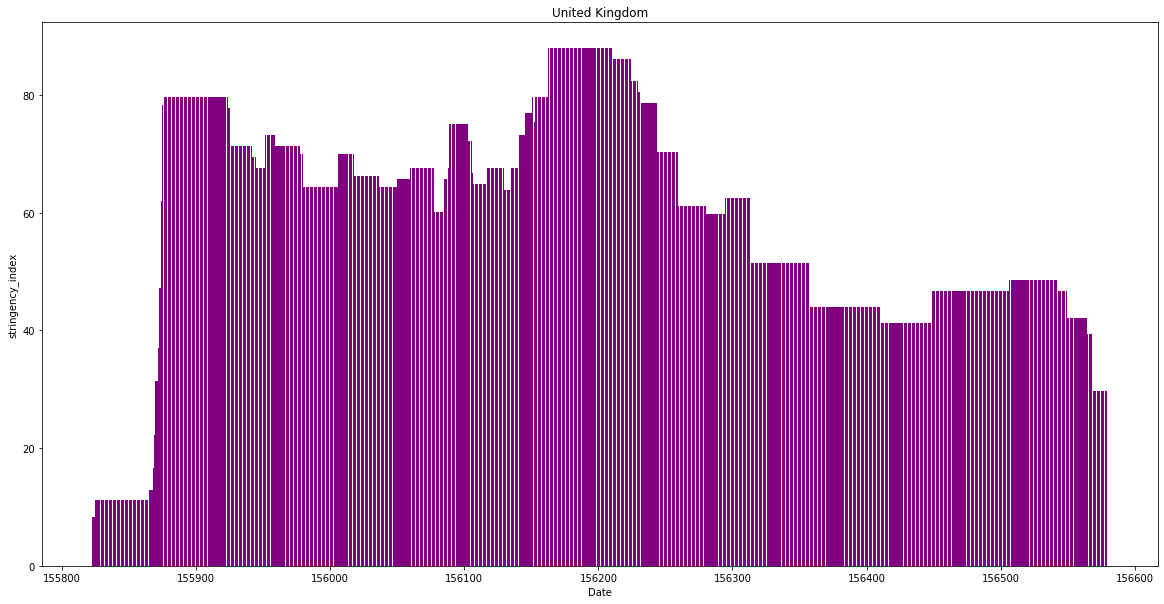

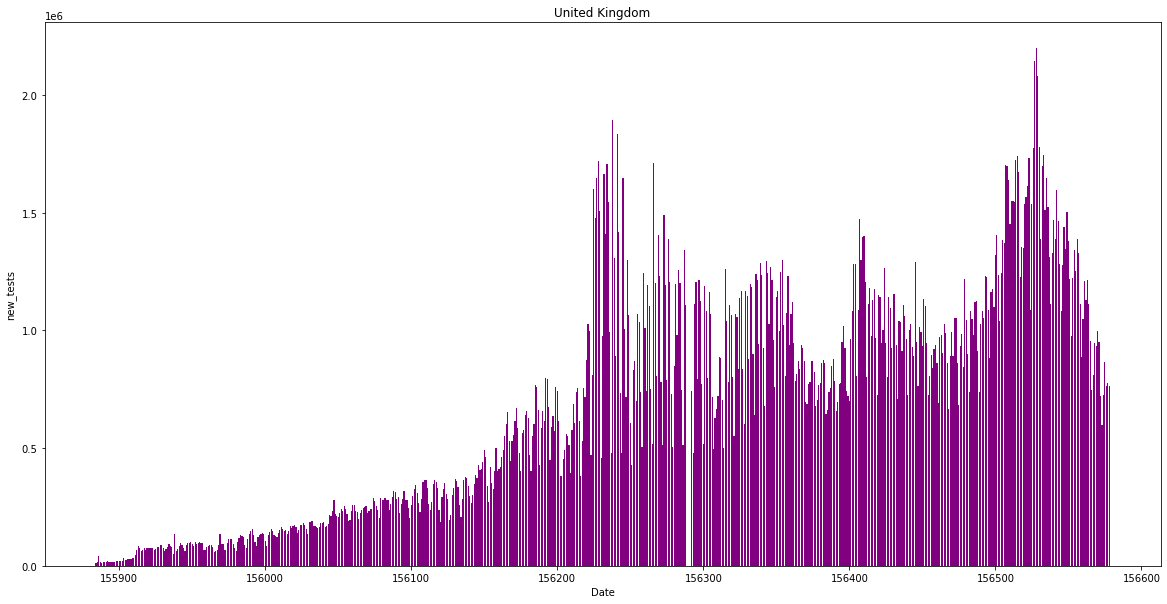

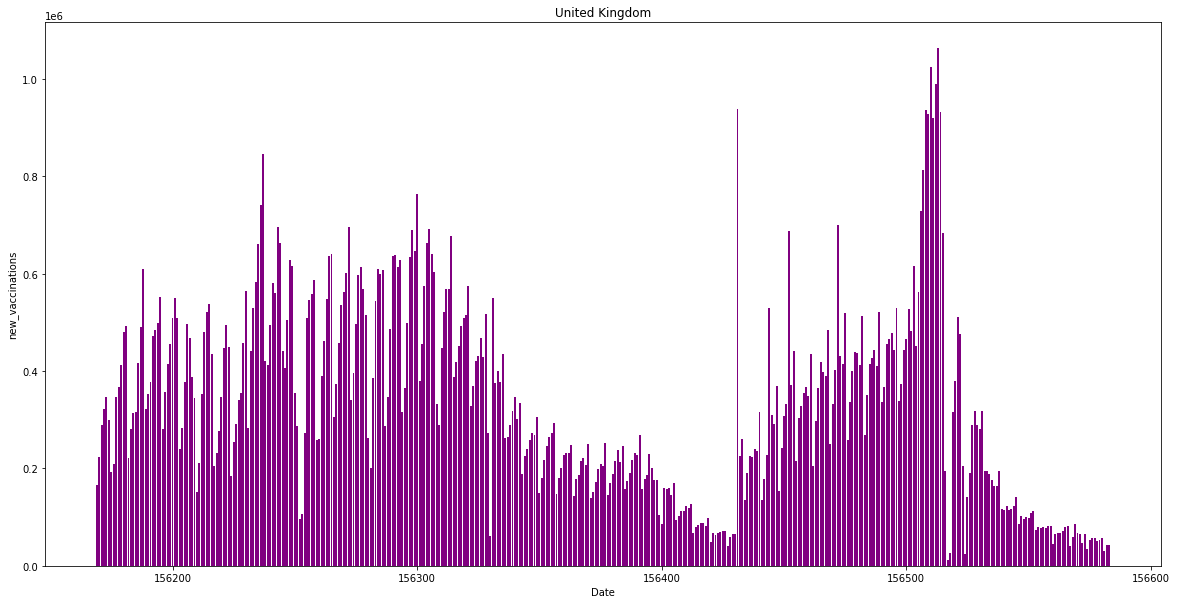

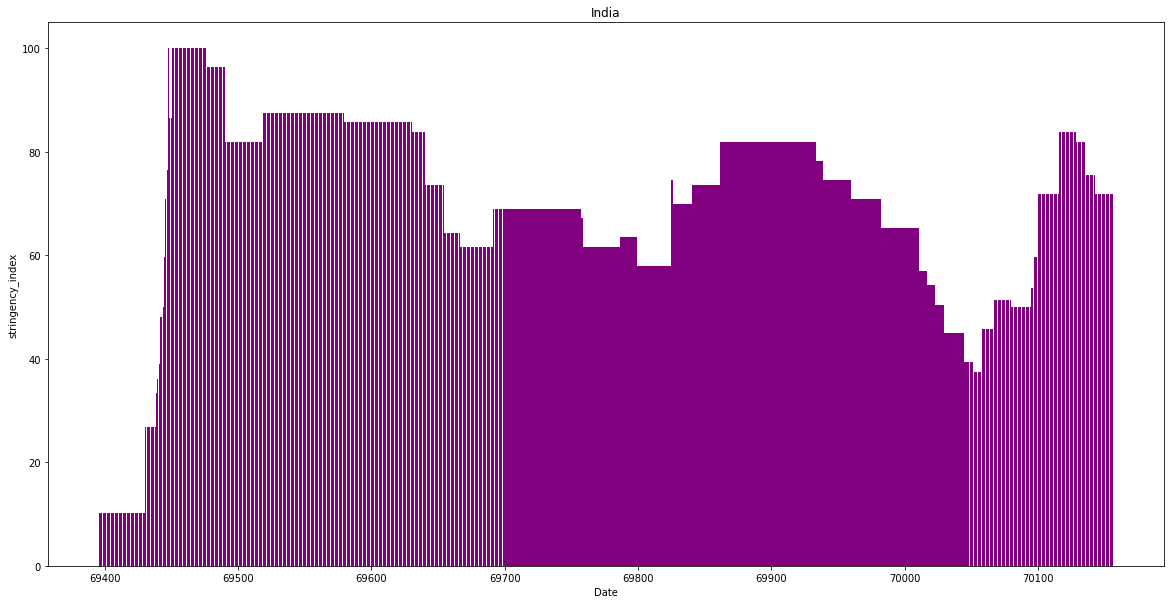

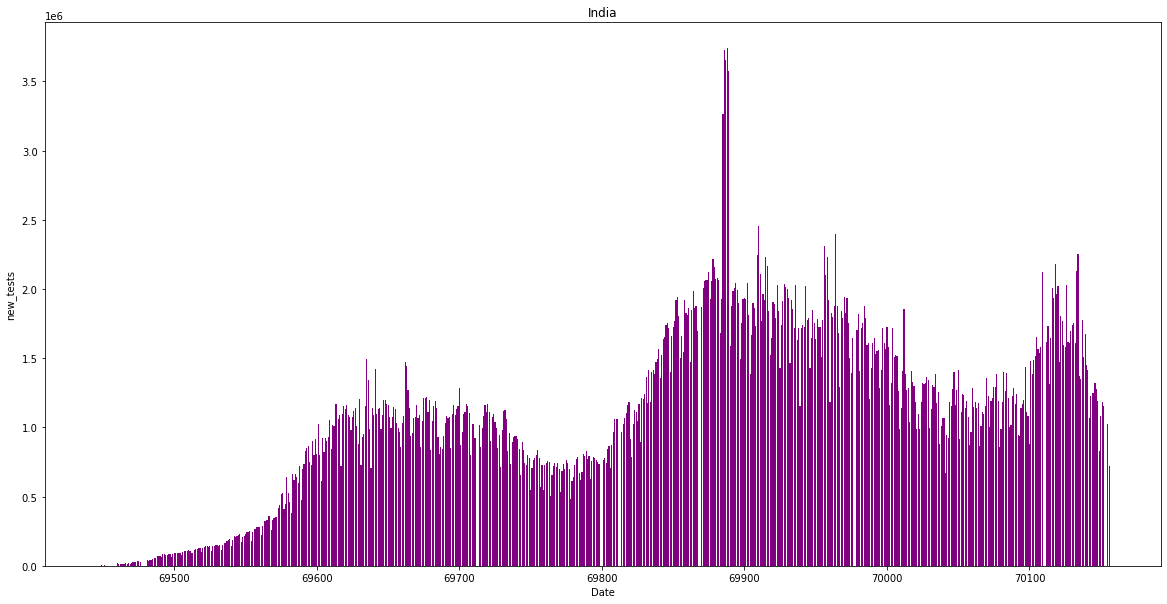

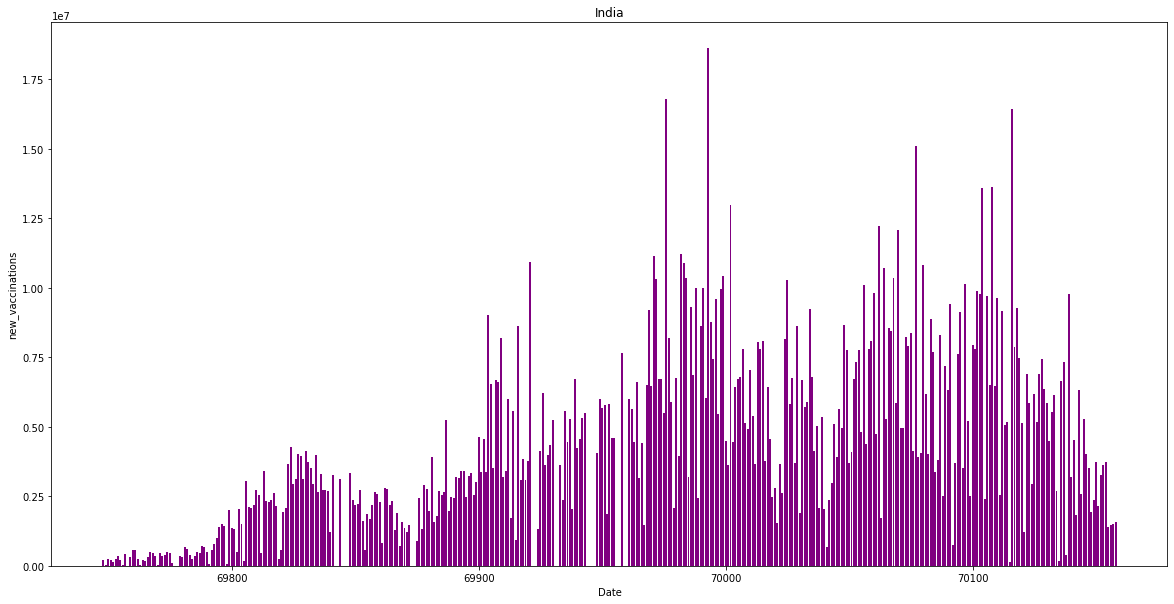

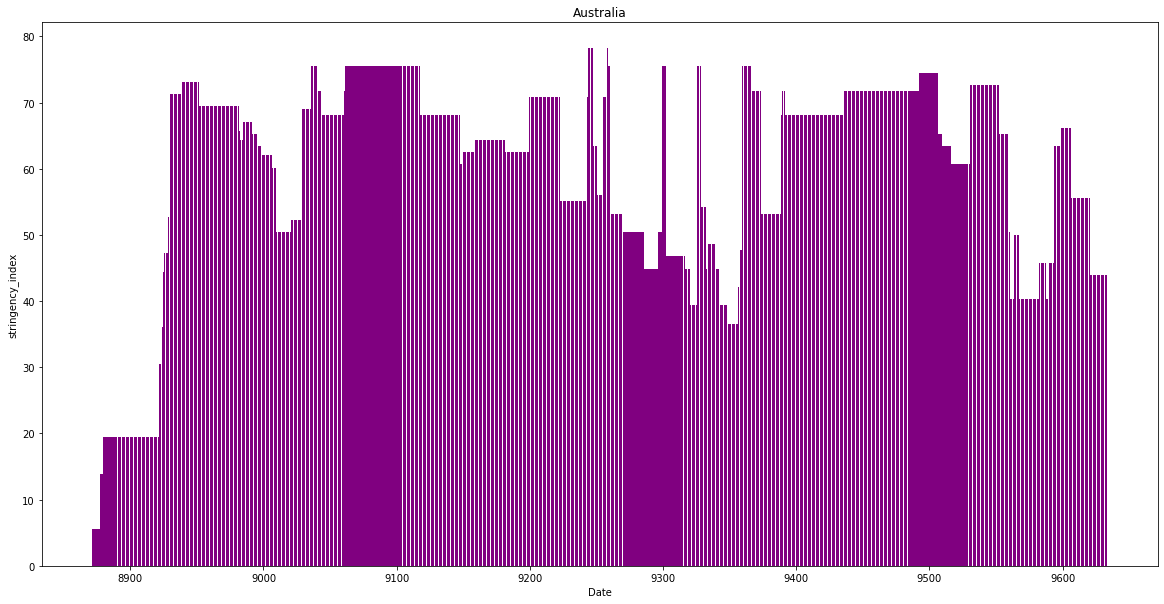

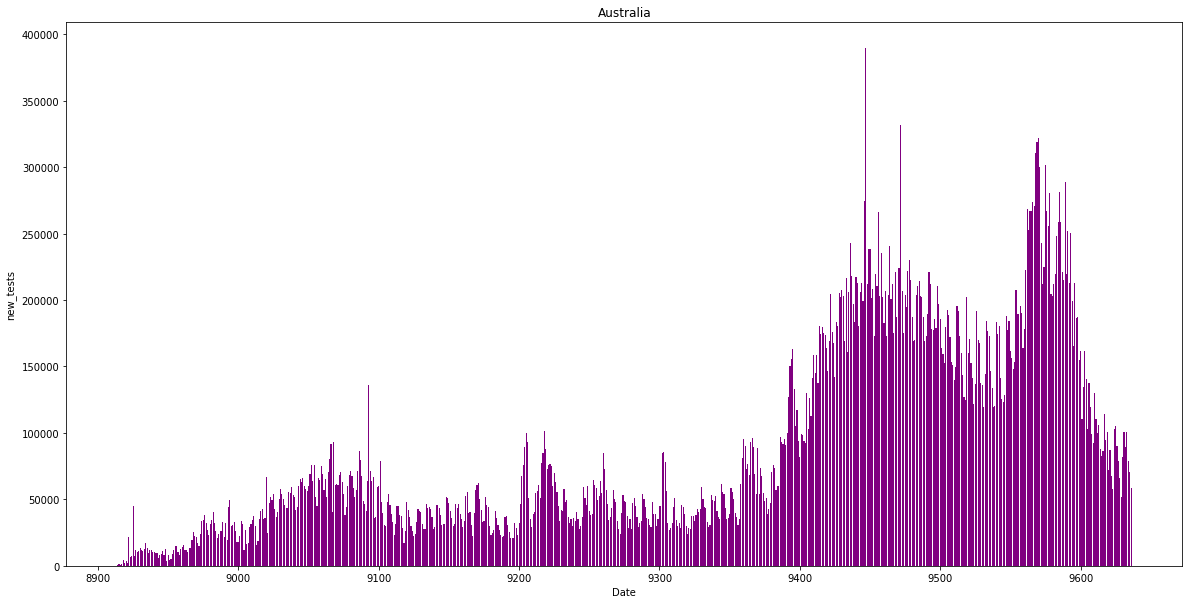

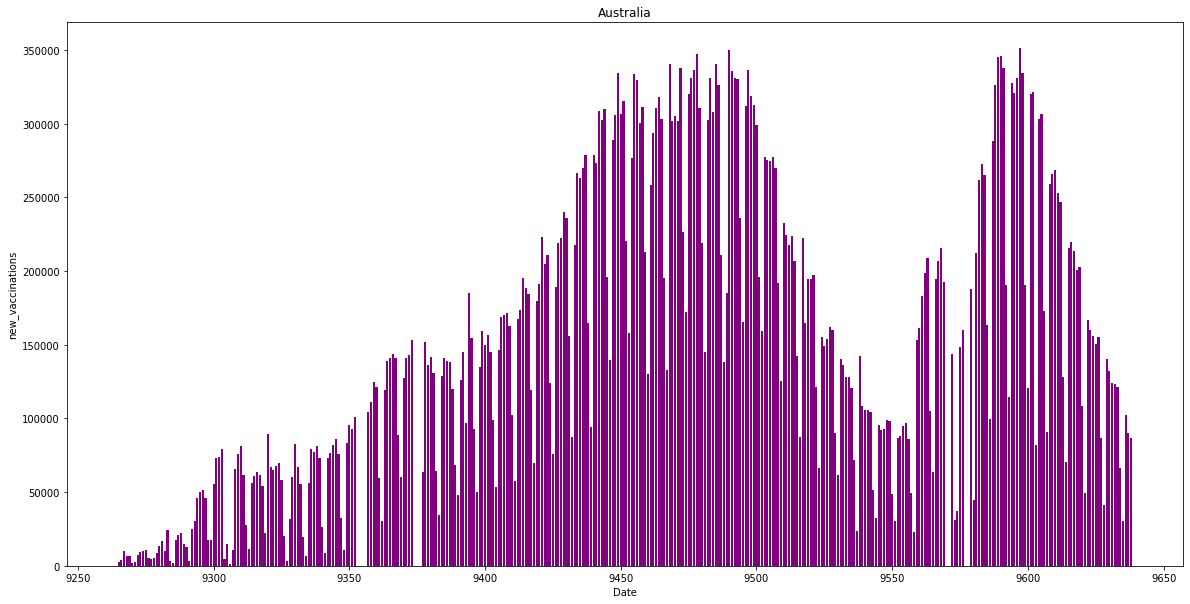

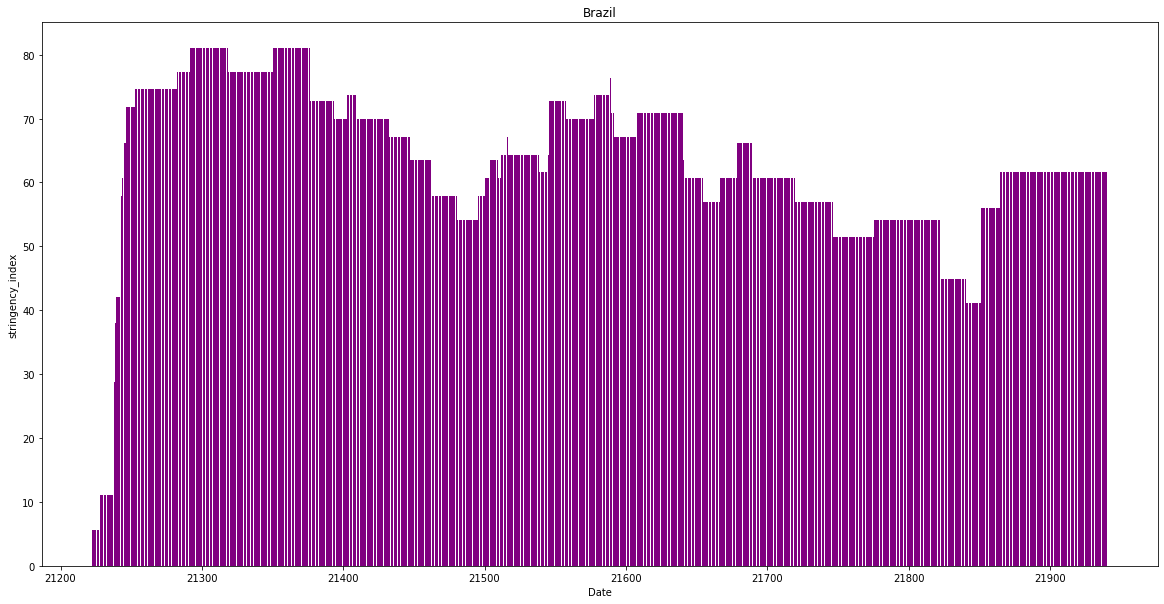

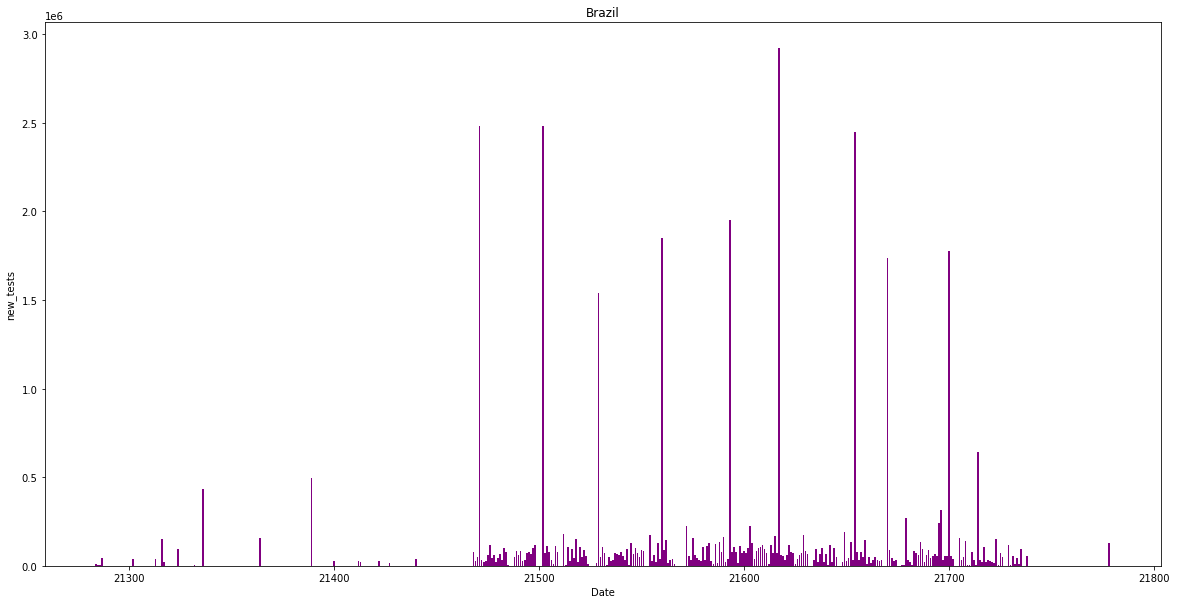

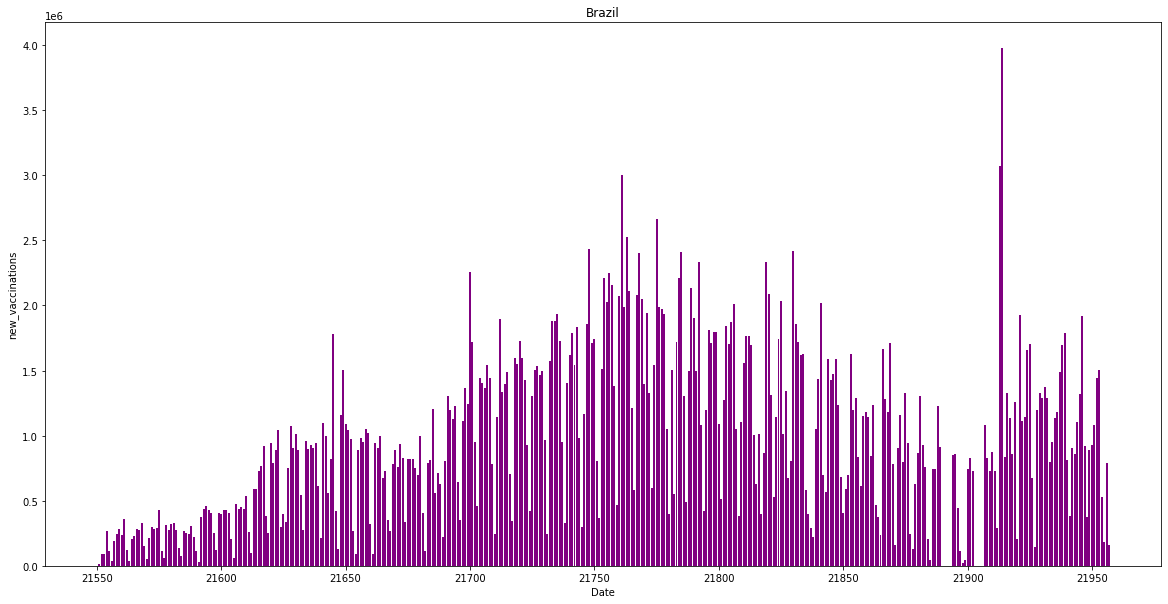

In [ ]:
country_list = ["United States", "United Kingdom", "India", "Australia", "Brazil"]
parameters = ["stringency_index","new_tests", "new_vaccinations"]
for country in country_list:
  for para in parameters:
    select_country_parameter(country, para)

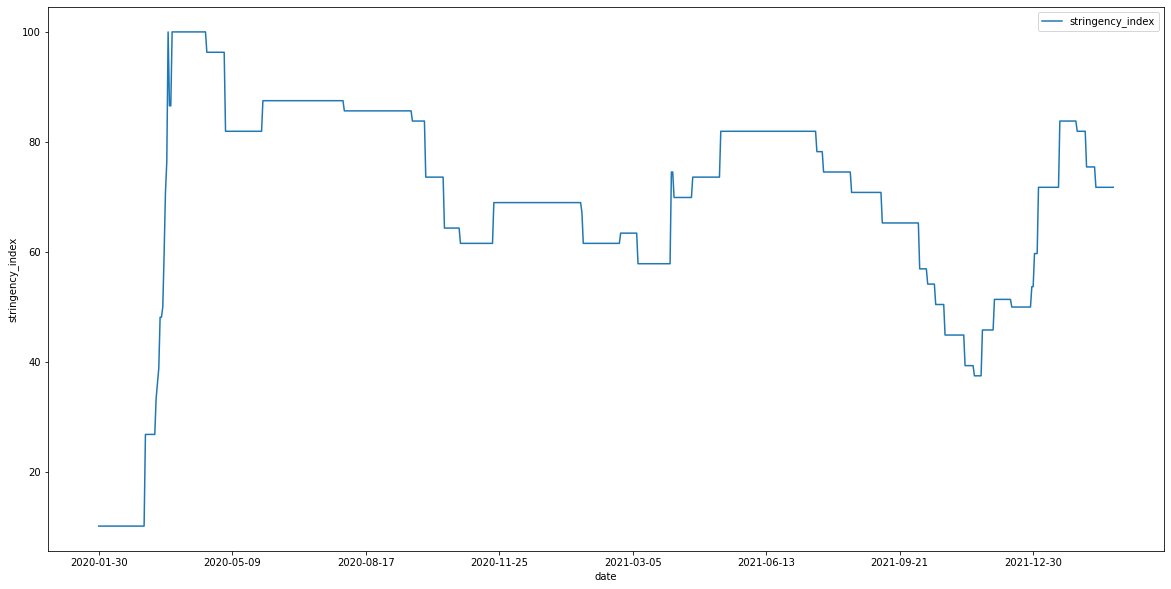

In [ ]:
monthwise_linegraph(India_obj)